In [ ]:
import numpy as np # import numpy
import pandas as pd # import pandas
import matplotlib.pyplot as plt # import matplotlib
import seaborn as sns # import seaborn
import plotly.graph_objs as go #import the graphical objects (plots) we'll need
#more potentially useful plotly imports
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.express as px

Importing Dataset

In [ ]:
df=pd.read_csv('/content/hate_crime.csv (1).zip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.



Checking Structure of Data

In [ ]:
df.head(20)

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
5,3018,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S
6,3019,1991,AR0600200,Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,School/College,Anti-White,Individual,S,S
7,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
8,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
9,3020,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Robbery,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201403 entries, 0 to 201402
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               201403 non-null  int64  
 1   DATA_YEAR                 201403 non-null  int64  
 2   ORI                       201403 non-null  object 
 3   PUB_AGENCY_NAME           201403 non-null  object 
 4   PUB_AGENCY_UNIT           5594 non-null    object 
 5   AGENCY_TYPE_NAME          201403 non-null  object 
 6   STATE_ABBR                201403 non-null  object 
 7   STATE_NAME                201403 non-null  object 
 8   DIVISION_NAME             201403 non-null  object 
 9   REGION_NAME               201403 non-null  object 
 10  POPULATION_GROUP_CODE     201403 non-null  object 
 11  POPULATION_GROUP_DESC     201403 non-null  object 
 12  INCIDENT_DATE             201403 non-null  object 
 13  ADULT_VICTIM_COUNT        35973 non-null   f

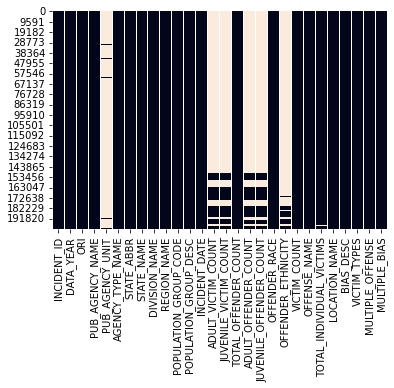

In [ ]:

sns.heatmap(df.isnull(),cbar=False)


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

INCIDENT_ID                      0
DATA_YEAR                        0
ORI                              0
PUB_AGENCY_NAME                  0
PUB_AGENCY_UNIT             195809
AGENCY_TYPE_NAME                 0
STATE_ABBR                       0
STATE_NAME                       0
DIVISION_NAME                    0
REGION_NAME                      0
POPULATION_GROUP_CODE            0
POPULATION_GROUP_DESC            0
INCIDENT_DATE                    0
ADULT_VICTIM_COUNT          165430
JUVENILE_VICTIM_COUNT       165907
TOTAL_OFFENDER_COUNT             0
ADULT_OFFENDER_COUNT        167451
JUVENILE_OFFENDER_COUNT     167458
OFFENDER_RACE                   19
OFFENDER_ETHNICITY          183253
VICTIM_COUNT                     0
OFFENSE_NAME                     0
TOTAL_INDIVIDUAL_VICTIMS      1606
LOCATION_NAME                    0
BIAS_DESC                        0
VICTIM_TYPES                     0
MULTIPLE_OFFENSE                 0
MULTIPLE_BIAS                    0
dtype: int64

In [ ]:
df['OFFENDER_RACE'].isnull().sum()

19

In [ ]:
df['OFFENDER_RACE'].fillna('Unknown',inplace=True)

In [ ]:
df['OFFENDER_RACE'].isnull().sum()

0

Column removal

In [ ]:
columns_for_removal = ['TOTAL_INDIVIDUAL_VICTIMS','ADULT_OFFENDER_COUNT','JUVENILE_OFFENDER_COUNT','ADULT_VICTIM_COUNT','JUVENILE_VICTIM_COUNT']
df.drop(columns_for_removal,axis=1,inplace=True)

In [ ]:
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,1,White,NaN,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,1,Black or African American,NaN,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,1,Black or African American,NaN,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,1,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,1,Black or African American,NaN,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,S,S


Again checking Null values

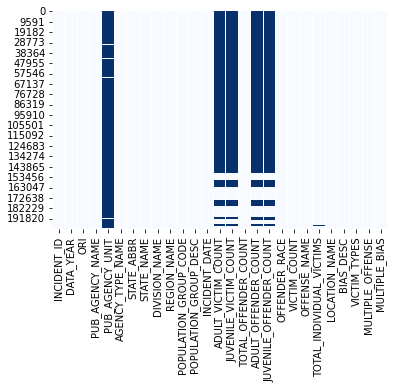

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap="Blues")

Checking OFFENDER_ETHNICITY null values

In [ ]:
df['OFFENDER_ETHNICITY'].value_counts()

Unknown                   13618
Not Hispanic or Latino     3532
Hispanic or Latino          901
Multiple                     99
Name: OFFENDER_ETHNICITY, dtype: int64

In [ ]:
df['OFFENDER_ETHNICITY'].isnull().sum()/len(df['OFFENDER_ETHNICITY'])

0.9098821765316306

Dropping Column(offender ethnicity)

In [ ]:
df.drop('OFFENDER_ETHNICITY',axis=1,inplace=True)

In [ ]:
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,NaN,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,NaN,Black or African American,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


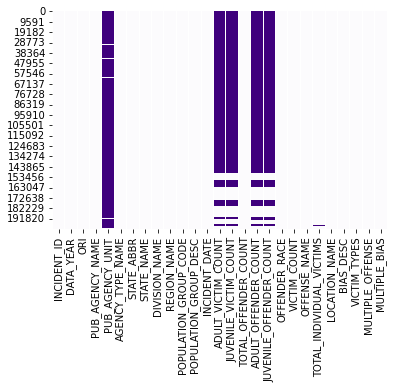

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap="Purples")

Checking PUB_Agent Unit Column

In [ ]:
df[df['PUB_AGENCY_UNIT'].isnull()==False]

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
119,96,1991,CO0070500,University of Colorado:,Boulder,University or College,CO,Colorado,Mountain,West,...,NaN,White,1,Destruction/Damage/Vandalism of Property,0.0,School/College,Anti-Jewish,Other,S,S
442,346,1991,IL0100700,University of Illinois:,Urbana,University or College,IL,Illinois,East North Central,Midwest,...,NaN,Unknown,2,Intimidation,2.0,School/College,Anti-Black or African American,Individual,S,S
965,3145,1991,MD0030400,University of Maryland:,Baltimore County,University or College,MD,Maryland,South Atlantic,South,...,NaN,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,School/College,Anti-Black or African American,Government,S,S
1012,533,1991,MD0160300,Maryland-National Capital Park Police:,Montgomery County,Other,MD,Maryland,South Atlantic,South,...,NaN,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,Other/Unknown,Anti-Black or African American,Government,S,S
1013,534,1991,MD0160300,Maryland-National Capital Park Police:,Montgomery County,Other,MD,Maryland,South Atlantic,South,...,NaN,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,Other/Unknown,Anti-Black or African American,Other,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200963,467516,2018,WAFBISE00,Federal Bureau of Investigation,Seattle,Federal,WA,Washington,Pacific,West,...,0.0,Unknown,1,Arson,NaN,Church/Synagogue/Temple/Mosque,Anti-Jehovah's Witness,Religious Organization,S,S
201267,387889,2018,WI0221400,University of Wisconsin:,Platteville,University or College,WI,Wisconsin,East North Central,Midwest,...,NaN,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,Anti-Black or African American,Government,S,S
201304,416621,2018,WIFBIMW00,Federal Bureau of Investigation,Milwaukee,Federal,WI,Wisconsin,East North Central,Midwest,...,0.0,White,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,Anti-Jewish,Individual,S,S
201401,463503,2018,WVWSP2400,State Police:,Madison,State Police,WV,West Virginia,South Atlantic,South,...,0.0,White,1,Intimidation,2.0,Residence/Home,Anti-White,Law Enforcement Officer,S,S


Dropping Column

In [ ]:
df.drop('PUB_AGENCY_UNIT',axis=1,inplace=True)

In [ ]:
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,...,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,City,AR,Arkansas,West South Central,South,5,...,NaN,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,City,AR,Arkansas,West South Central,South,6,...,NaN,Black or African American,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,NaN,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,NaN,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,NaN,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


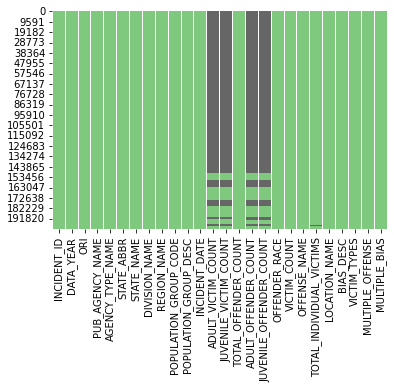

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap="Accent")

Checking Null values again

In [ ]:
df.isnull().sum()

INCIDENT_ID                      0
DATA_YEAR                        0
ORI                              0
PUB_AGENCY_NAME                  0
AGENCY_TYPE_NAME                 0
STATE_ABBR                       0
STATE_NAME                       0
DIVISION_NAME                    0
REGION_NAME                      0
POPULATION_GROUP_CODE            0
POPULATION_GROUP_DESC            0
INCIDENT_DATE                    0
ADULT_VICTIM_COUNT          165430
JUVENILE_VICTIM_COUNT       165907
TOTAL_OFFENDER_COUNT             0
ADULT_OFFENDER_COUNT        167451
JUVENILE_OFFENDER_COUNT     167458
OFFENDER_RACE                   19
VICTIM_COUNT                     0
OFFENSE_NAME                     0
TOTAL_INDIVIDUAL_VICTIMS      1606
LOCATION_NAME                    0
BIAS_DESC                        0
VICTIM_TYPES                     0
MULTIPLE_OFFENSE                 0
MULTIPLE_BIAS                    0
dtype: int64